<a href="https://colab.research.google.com/github/CH9812/User-Based-Recommendation-Systems/blob/main/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df = pd.read_csv('/kaggle/input/amazon-product-reviews/Reviews.csv')

In [ ]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
df  = df[['Id','ProductId','Score','Summary','Text']]

In [ ]:
df.head(3)

,Id,ProductId,Score,Summary,Text
0,1,B001E4KFG0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,4,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
df.shape

(568454, 5)

In [ ]:
df = df.iloc[:10000,:]

<Axes: >

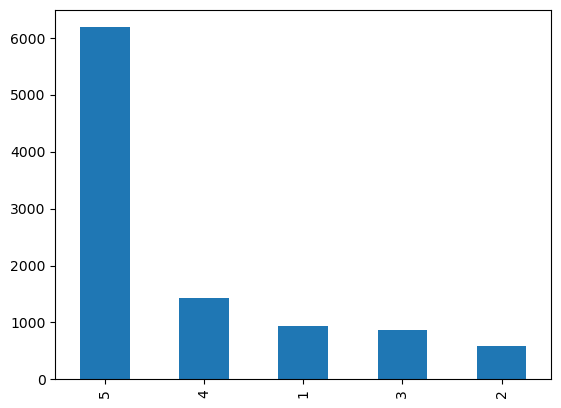

In [ ]:
df['Score'].value_counts().plot(kind='bar')

In [ ]:
df['Summary']

0                  Good Quality Dog Food
1                      Not as Advertised
2                  "Delight" says it all
3                         Cough Medicine
4                            Great taffy
                      ...               
9995                        constipation
9996    Constipation Not A Problem if...
9997                  Love this formula!
9998                     very convenient
9999          The best weve tried so far
Name: Summary, Length: 10000, dtype: object

In [ ]:
df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

## Rating Base Recommendation system

In [ ]:
# Select the required columns for recommendation
ratings_df = df[['Id', 'ProductId', 'Score']]
ratings_df

,Id,ProductId,Score
0,1,B001E4KFG0,5
1,2,B00813GRG4,1
2,3,B000LQOCH0,4
3,4,B000UA0QIQ,2
4,5,B006K2ZZ7K,5
...,...,...,...
9995,9996,B000P41A28,1
9996,9997,B000P41A28,5
9997,9998,B000P41A28,5
9998,9999,B000P41A28,5


# Create a pivot table to represent the user-item rating matrix

In a rating-based recommendation system, a pivot table is created to represent the user-item rating matrix. This matrix captures the ratings given by users to different items/products. Each row in the pivot table represents a user, and each column represents an item/product

In [ ]:
pivot_table = ratings_df.pivot_table(index='Id', columns='ProductId', values='Score', fill_value=0)

In [ ]:
pivot_table

ProductId,B00002NCJC,B00002Z754,B00005V3DC,B000084DVR,B000084E1U,B000084EK4,B000084EK5,B000084EK6,B000084EK7,B000084EK8,...,B0092XAMDQ,B0093NIWVO,B00959DMWK,B00961CUXO,B0096E5196,B009AVDFCK,B009D668KS,B009HINRX8,B009UOFU20,B009WSNWC4
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
items_similarity = cosine_similarity(pivot_table)

In [ ]:
# Example: Get top-k recommendations for a given user
user_id = 4
k = 5

In [ ]:
user_ratings = pivot_table.loc[user_id,:].values.reshape(1,-1)
user_ratings

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Calculate the similarity between the user's ratings and all items
user_item_similarity = cosine_similarity(user_ratings,pivot_table)

In [ ]:
# Get the indices of top-k similar items
similar_item_indices = user_item_similarity.argsort()[0, ::-1][:k]

In [ ]:
similar_item_indices

array([   3, 9999, 3330, 3337, 3336])

# Drive Code With Recommendation

In [ ]:
def recommend_items(ratings_df):
    # Filter recommendations based on minimum rating
    filtered_recommendations = ratings_df[ratings_df['Score'] >= 3].head(50)

    return filtered_recommendations


recommendations = recommend_items(ratings_df)

if not recommendations.empty:
    for index, row in recommendations.iterrows():
        print("Product ID:", row['ProductId'], "Score:", row['Score'])
else:
    print("No recommendations found.")


Product ID: B001E4KFG0 Score: 5
Product ID: B000LQOCH0 Score: 4
Product ID: B006K2ZZ7K Score: 5
Product ID: B006K2ZZ7K Score: 4
Product ID: B006K2ZZ7K Score: 5
Product ID: B006K2ZZ7K Score: 5
Product ID: B000E7L2R4 Score: 5
Product ID: B00171APVA Score: 5
Product ID: B0001PB9FE Score: 5
Product ID: B0009XLVG0 Score: 5
Product ID: B001GVISJM Score: 4
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 5
Product ID: B001GVISJM Score: 4
Product ID: B00144C10S Score: 5
Product ID: B0001PB9FY Score: 5
Product ID: B003F6UO7K Score: 5
Product ID: B003F6UO7K Score: 5
Product ID: B001EO5QW8 Score: 4
Product ID: B001EO5QW8 Score: 4
Product ID: B001EO5QW8 Score: 5
Product ID: B001EO5QW8 Score: 4
Product 

In [ ]:
ratings_df

,Id,ProductId,Score
0,1,B001E4KFG0,5
1,2,B00813GRG4,1
2,3,B000LQOCH0,4
3,4,B000UA0QIQ,2
4,5,B006K2ZZ7K,5
...,...,...,...
9995,9996,B000P41A28,1
9996,9997,B000P41A28,5
9997,9998,B000P41A28,5
9998,9999,B000P41A28,5


# Rating Base using Kmeans clutering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# # Load the dataset
# # df = pd.read_csv('your_dataset.csv')

# # Select the required columns for recommendation
# ratings_df = df[['Id', 'ProductId', 'Score']]

# Create a pivot table to represent the user-item rating matrix
# pivot_table = ratings_df.pivot_table(index='Id', columns='ProductId', values='Score', fill_value=0)

# Apply k-means clustering
num_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pivot_table)

# Example: Get recommendations for a given user
user_id = 1

# Get the cluster label for the given user
user_cluster_label = cluster_labels[user_id - 1]

# Get all users in the same cluster as the given user
users_in_same_cluster = pivot_table.index[cluster_labels == user_cluster_label]

# Get the average ratings of the users in the same cluster
average_ratings = pivot_table.loc[users_in_same_cluster].mean()

# Sort the average ratings in descending order
sorted_ratings = average_ratings.sort_values(ascending=False)

# Example: Get top-k recommendations
k = 5
top_k_recommendations = sorted_ratings.head(k)

# Print the top-k recommendations
print("Top", k, "recommendations for user", user_id, ":")
for product_id, rating in top_k_recommendations.items():
    print("Product ID:", product_id, "Rating:", rating)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Top 5 recommendations for user 1 :
Product ID: B003VXFK44 Rating: 0.19659527732015375
Product ID: B001RVFDOO Rating: 0.14805052169137836
Product ID: B005K4Q1VI Rating: 0.14091158704008785
Product ID: B004391DK0 Rating: 0.10971993410214168
Product ID: B000G6RYNE Rating: 0.0956617243272927


# User Base recommendation system

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset into a pandas DataFrame
data = pd.read_csv("rating_data.csv")

# Calculate user similarity using cosine similarity
user_similarity = cosine_similarity(data.values[:, 2:])

# Select neighbors for the target user (e.g., user with index 0)
target_user = 0
neighbor_indices = user_similarity[target_user].argsort()[::-1][1:]

# Generate recommendations based on the selected neighbors
recommended_items = []
for neighbor_index in neighbor_indices:
    neighbor_ratings = data.values[neighbor_index, 2:]
    target_user_ratings = data.values[target_user, 2:]

    # Find items that the neighbor has rated highly but the target user has not
    recommended_indices = [i for i, rating in enumerate(neighbor_ratings) if rating > 4 and target_user_ratings[i] == 0]

    # Add the recommended items to the list
    recommended_items.extend(data.values[target_user, recommended_indices])

# Display the recommended items
recommended_df = pd.DataFrame(recommended_items, columns=data.columns[2:])
print(recommended_df)


## Collaborative Filtering

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset into a pandas DataFrame
data = pd.DataFrame({
    'Id': [1, 2, 3],
    'ProductId': ['B001E4KFG0', 'B00813GRG4', 'B000LQOCH0'],
    'Score': [5, 1, 4],
    'Summary': ['Good Quality Dog Food', 'Not as Advertised', '"Delight" says it all'],
    'Text': ['I have bought several of the Vitality canned d...', 'Product arrived labeled as Jumbo Salted Peanut...', 'This is a confection that has been around a fe...']
})

# Create the user-item matrix
user_item_matrix = data.pivot(index='Id', columns='ProductId', values='Score').fillna(0)

# Calculate the user similarity matrix using cosine similarity
user_similarity = cosine_similarity(user_item_matrix)

# Select neighbors for the target user (e.g., user with index 0)
target_user_index = 0
neighbor_indices = user_similarity[target_user_index].argsort()[::-1][1:]

# Generate recommendations based on the selected neighbors
recommended_items = []
for neighbor_index in neighbor_indices:
    neighbor_ratings = user_item_matrix.loc[neighbor_index]
    target_user_ratings = user_item_matrix.loc[target_user_index]

    # Find items that the neighbor has rated highly but the target user has not
    recommended_indices = [i for i, rating in enumerate(neighbor_ratings) if rating > 4 and target_user_ratings[i] == 0]

    # Add the recommended items to the list
    recommended_items.extend(user_item_matrix.columns[recommended_indices])

# Display the recommended items
recommended_df = data[data['ProductId'].isin(recommended_items)]
print(recommended_df)
